Likes Nubank = 1070
Retweets Nubank = 765
Comments Nubank = 1
Likes Guia Bolso = 42
Retweets Guia Bolso = 0
Comments Guia Bolso = 0
Likes Pic pay = 59
Retweets Pic pay = 0
Comments Pic pay = 0
['13-09-2022 23:37', 616169, 1070, 765, 1]
['13-09-2022 23:37', 23876, 42, 0, 0]
['13-09-2022 23:37', 120640, 59, 0, 0]


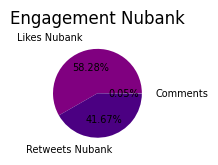

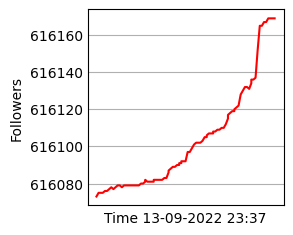

C:\Users\Giovanni\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


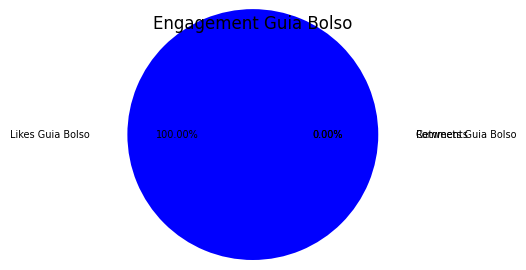

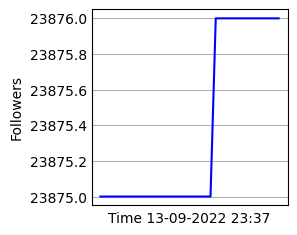

C:\Users\Giovanni\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


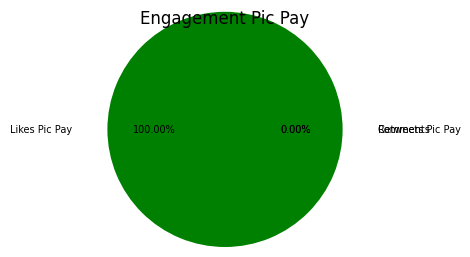

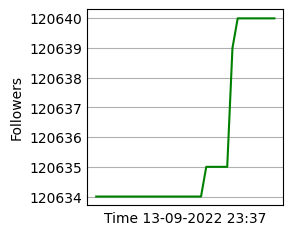

C:\Users\Giovanni\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


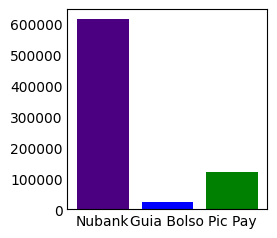

In [332]:
import tweepy
import pandas as pd
from tweepy import OAuthHandler
from matplotlib import pyplot as plt, dates as mdates
import numpy as np
from datetime import datetime
import csv
from csv import writer
import pandas as pandasForSortingCSV
import matplotlib.dates
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter

#define lists
Nubank= []
GuiaBolso = []
PicPay =[]

#Get today date and time

now = datetime.now() 
today = now.strftime("%d-%m-%Y %H:%M")


#set keys for tweepy
consumer_key = 'MlJ4R0dVUFBQVV9oRU03aFpsOEw6MTpjaQ'
consumer_secret = 'VMnEydN7ALBsp4bAZcszf4CAS8XMMghWvbEhQEbefscRAM95z3'
access_token = '256703271-ZVi1tTtux4dK8bjd2xEUcPeiH7kSVKoHosxsXI9x'
access_secret = 'DJxKolYmKBwdSNYSSgTW3cP3MA2g6RxlOSKsxH9rLb3Lz'
auth = tweepy.OAuth2BearerHandler("AAAAAAAAAAAAAAAAAAAAABDLgwEAAAAAs3vWF5uKXGs4tFb73FuqLURI%2BjQ%3DmKHbMpcewVgLuvP8VlTjsHVCE96mj40UjDjRgOwYOwhukzNN6H")
api = tweepy.API(auth)

def getClient():
    client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAABDLgwEAAAAAs3vWF5uKXGs4tFb73FuqLURI%2BjQ%3DmKHbMpcewVgLuvP8VlTjsHVCE96mj40UjDjRgOwYOwhukzNN6H')
    return client

def getUserInfo(client,username):
    user = client.get_user(username=username,user_fields='public_metrics')
    return user

client = getClient()
Nu1 = getUserInfo(client,'nubank')
Gb1 = getUserInfo(client,'guiabolso')
Pp1 = getUserInfo(client,'picpay')

#scrape for FollowersNu

Nu = Nu1.data.public_metrics['followers_count']
Gb = Gb1.data.public_metrics['followers_count']
Pp = Pp1.data.public_metrics['followers_count']

#scrape last 100 tweets
tweetsNu = api.user_timeline(screen_name='nubank', count=100)
tweetsGb = api.user_timeline(screen_name='guiabolso', count=100)
tweetsPp = api.user_timeline(screen_name='picpay', count=100)

likesNu = 0 
RetweetsNu = 0  
CommentsNu = 0 

likesGb = 0 
RetweetsGb= 0  
CommentsGb = 0 

likesPp = 0 
RetweetsPp = 0  
CommentsPp = 0 

for tweet in tweetsNu:   
    
    likesNu += tweet.favorite_count  #likesNu on the last 100 tweets of some twitter account.
    RetweetsNu += tweet.retweet_count  #RetweetsNu on the last 100 tweets of some twitter account.
    CommentsNu += len(tweet._json['entities']['hashtags'])  #CommentsNu on the last 100 tweets of some twitter account.

for tweet in tweetsGb:   
    
    likesGb += tweet.favorite_count  #likesGb on the last 100 tweets of some twitter account.
    RetweetsGb += tweet.retweet_count  #RetweetsGb on the last 100 tweets of some twitter account.
    CommentsGb += len(tweet._json['entities']['hashtags'])  #CommentsGb on the last 100 tweets of some twitter account.

for tweet in tweetsPp:   
    
    likesPp += tweet.favorite_count  #likesPp on the last 100 tweets of some twitter account.
    RetweetsPp += tweet.retweet_count  #RetweetsPp on the last 100 tweets of some twitter account.
    CommentsPp += len(tweet._json['entities']['hashtags'])  #CommentsPp on the last 100 tweets of some twitter account.
    
print("Likes Nubank =",likesNu)   #Printing total number of likesNu
print("Retweets Nubank =",RetweetsNu)
print("Comments Nubank =",CommentsNu)

print("Likes Guia Bolso =",likesGb)   #Printing total number of likesPp
print("Retweets Guia Bolso =",RetweetsGb)
print("Comments Guia Bolso =",CommentsGb)

print("Likes Pic pay =",likesPp)   #Printing total number of likesPp
print("Retweets Pic pay =",RetweetsPp)
print("Comments Pic pay =",CommentsPp)

# Append to list

Nubank.append(today)
Nubank.append(Nu)
Nubank.append(likesNu)
Nubank.append(RetweetsNu)
Nubank.append(CommentsNu) 
print(Nubank)  

GuiaBolso.append(today)
GuiaBolso.append(Gb)
GuiaBolso.append(likesGb)
GuiaBolso.append(RetweetsGb)
GuiaBolso.append(CommentsGb) 
print(GuiaBolso)  

PicPay.append(today)
PicPay.append(Pp)
PicPay.append(likesPp)
PicPay.append(RetweetsPp)
PicPay.append(CommentsPp) 
print(PicPay)  

fileNu = r'fileNu.csv'
fileGb = r'fileGb.csv'
filePp = r'filePp.csv'

#write data in csv file - Nubank

with open(fileNu, 'a', newline='') as f_object:
   
    writer = csv.writer(f_object, delimiter=';')
    writer.writerow(Nubank) 
    f_object.close()
    
#write data in csv file - Guia Bolso
with open(fileGb, 'a', newline='') as f_object:
   
    writer = csv.writer(f_object, delimiter=';')
    writer.writerow(GuiaBolso) 
    f_object.close()

#write data in csv file - Pic Pay
with open(filePp, 'a', newline='') as f_object:
   
    writer = csv.writer(f_object, delimiter=';')
    writer.writerow(PicPay) 
    f_object.close()

# make data for NuBank Graphs
x = [likesNu, RetweetsNu, CommentsNu,]
labelsNu = ["Likes Nubank", "Retweets Nubank", "Comments"]
textprops = {"fontsize":7} # Font size of text in pie chart
# plot
fig, ax1 = plt.subplots()
ax1.pie(x, colors=['Purple','Indigo','White'], radius =0.9, center=(-1,-1), labels = labelsNu, labeldistance = 1.3,  
        autopct = "%0.2f%%",textprops = textprops)

#ax1.set(xlim=(0, 10), ylim=(0, 10))
ax1.set_title("Engagement Nubank")
#plt.autoscale(enable=True, axis='both', tight=None)
plt.show()


#Plot Nubank Followers Line Graph
columns = ["data", "folo"]
df = pd.read_csv(fileNu, usecols=columns,sep=';')
fig, ax = plt.subplots(tight_layout=False)
ax.set_ylabel('Followers')
ax.set_xlabel(f"Time {today}")


# draw one line
ln1, = ax.plot(df.data, df.folo, color='r')
ax.tick_params(axis='x',rotation=90)
y_formatter = ScalarFormatter(useOffset=False)
plt.xticks([])
ax.yaxis.set_major_formatter(y_formatter)
ax.grid(True)

###########################################################################

# make data for Guia Bolso Graphs
x1 = [likesGb, RetweetsGb, CommentsGb,]
labelsGb = ["Likes Guia Bolso", "Retweets Guia Bolso", "Comments"]
textprops = {"fontsize":7} # Font size of text in pie chart
# plot
fig, ax1 = plt.subplots()
ax1.pie(x1, colors=['Blue', "deepskyblue", "white"], radius =1.6, center=(-1,-1), labels = labelsGb, labeldistance = 1.3,  
        autopct = "%0.2f%%",textprops = textprops)

ax1.set_title("Engagement Guia Bolso")
plt.show()


#Plot Guia Bolso Followers Line Graph
columns = ["data", "followers"]
df = pd.read_csv(fileGb, usecols=columns,sep=';')
fig, ax = plt.subplots(tight_layout=False)
ax.set_ylabel('Followers')
ax.set_xlabel(f"Time {today}")

# draw one line
ln1, = ax.plot(df.data, df.followers, color='b')
ax.tick_params(axis='x',rotation=90)
y_formatter = ScalarFormatter(useOffset=False)
plt.xticks([])
ax.yaxis.set_major_formatter(y_formatter)
ax.grid(True)

###########################################################################

# make data for Pic Pay Graphs
x1 = [likesPp, RetweetsPp, CommentsPp,]
labelsGb = ["Likes Pic Pay", "Retweets Pic Pay", "Comments"]
textprops = {"fontsize":7} # Font size of text in pie chart
# plot
fig, ax1 = plt.subplots()
ax1.pie(x1, colors=['Green', "springgreen", "white"], radius =1.5, center=(-1,-1), labels = labelsGb, labeldistance = 1.3,  
        autopct = "%0.2f%%",textprops = textprops)

ax1.set_title("Engagement Pic Pay")
plt.show()


#Plot Pic pay Followers Line Graph
columns = ["data", "followersPp"]
df = pd.read_csv(filePp, usecols=columns,sep=';')
fig, ax = plt.subplots(tight_layout=False)
ax.set_ylabel('Followers')
ax.set_xlabel(f"Time {today}")

# draw one line
ln1, = ax.plot(df.data, df.followersPp, color='g')
ax.tick_params(axis='x',rotation=90)
y_formatter = ScalarFormatter(useOffset=False)
plt.xticks([])
ax.yaxis.set_major_formatter(y_formatter)
ax.grid(True)

##################

fig = plt.figure()
cx = fig.add_axes([0,0,1,1])
fintechs = ['Nubank', 'Guia Bolso', 'Pic Pay']
FollowersToday = [Nu,Gb,Pp]
cx.bar(fintechs,FollowersToday)
x_pos = np.arange(len(fintechs))
plt.bar(x_pos, FollowersToday, color=['indigo', 'blue', 'green'])
plt.show()


    